# Final project guidelines

**Note:** Use these guidelines if and only if you are pursuing a **final project of your own design**. For those taking the final exam instead of the project, see the (separate) final exam notebook.

## Guidelines

These guidelines are intended for **undergraduates enrolled in INFO 3350**. If you are a graduate student enrolled in INFO 6350, you're welcome to consult the information below, but you have wider latitude to design and develop your project in line with your research goals.

### The task

Your task is to: identify an interesting problem connected to the humanities or humanistic social sciences that's addressable with the help of computational methods, formulate a hypothesis about it, devise an experiment or experiments to test your hypothesis, present the results of your investigations, and discuss your findings.

These tasks essentially replicate the process of writing an academic paper. You can think of your project as a paper in miniature.

You are free to present each of these tasks as you see fit. You should use narrative text (that is, your own writing in a markdown cell), citations of others' work, numerical results, tables of data, and static and/or interactive visualizations as appropriate. Total length is flexible and depends on the number of people involved in the work, as well as the specific balance you strike between the ambition of your question and the sophistication of your methods. But be aware that numbers never, ever speak for themselves. Quantitative results presented without substantial discussion will not earn high marks. 

Your project should reflect, at minimum, ten **or more** hours of work by each participant, though you will be graded on the quality of your work, not the amount of time it took you to produce it. Most high-quality projects represent twenty or more hours of work by each member.

#### Pick an important and interesting problem!

No amount of technical sophistication will overcome a fundamentally uninteresting problem at the core of your work. You have seen many pieces of successful computational humanities research over the course of the semester. You might use these as a guide to the kinds of problems that interest scholars in a range of humanities disciplines. You may also want to spend some time in the library, reading recent books and articles in the professional literature. **Problem selection and motivation are integral parts of the project.** Do not neglect them.

### Format

You should submit your project as a Jupyter notebook, along with all data necessary to reproduce your analysis. If your dataset is too large to share easily, let us know in advance so that we can find a workaround. If you have a reason to prefer a presentation format other than a notebook, likewise let us know so that we can discuss the options.

Your report should have four basic sections (provided in cells below for ease of reference):

1. **Introduction and hypothesis.** What problem are you working on? Why is it interesting and important? What have other people said about it? What do you expect to find?
2. **Corpus, data, and methods.** What data have you used? Where did it come from? How did you collect it? What are its limitations or omissions? What major methods will you use to analyze it? Why are those methods the appropriate ones?
3. **Results.** What did you find? How did you find it? How should we read your figures? Be sure to include confidence intervals or other measures of statistical significance or uncetainty where appropriate.
4. **Discussion and conclusions.** What does it all mean? Do your results support your hypothesis? Why or why not? What are the limitations of your study and how might those limitations be addressed in future work?

Within each of those sections, you may use as many code and markdown cells as you like. You may, of course, address additional questions or issues not listed above.

All code used in the project should be present in the notebook (except for widely-available libraries that you import), but **be sure that we can read and understand your report in full without rerunning the code**. Be sure, too, to explain what you're doing along the way, both by describing your data and methods and by writing clean, well commented code.

### Grading

This project takes the place of the take-home final exam for the course. It is worth 35% of your overall grade. You will be graded on the quality and ambition of each aspect of the project. No single component is more important than the others.

### Practical details

* The project is due at **noon on Saturday, December 9** via upload to CMS of a single zip file containing your fully executed Jupyter notebook and all associated data.
* You may work alone or in a group of up to three total members.
    * If you work in a group, be sure to list the names of the group members.
    * For groups, create your group on CMS and submit one notebook for the entire group. **Each group should also submit a statement of responsibility** that describes in general terms who performed which parts of the project.
* You may post questions on Ed, but should do so privately (visible to course staff only).
* Interactive visualizations do not always work when embedded in shared notebooks. If you plan to use interactives, you may need to host them elsewhere and link to them.

---

Are signs of Mental health received differently across various languages? Can the "emotionally involved" semantics of a word be translated across various languages? 

https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus/data

1) Data cleaning and visualization
2) Build translation of english texts (using FlanT5 and M2M)

- choose a easy translatable language (English -> Spanish) and then a hard one (English -> Farsi)

3) Validate it (??? somehow, Google translate API, https://github.com/matheuss/google-translate-api) 

- comment on pitfalls of google translate's innaccuracy 

- discuss how well translation models are at translating emotionally charged texts
    - compare it to a baseline (maybe google and see what the average performance is likee)

4) Baseline models (log reg, random forest, naive bayes)

5) Run BERT and attempt to compare labels

6) repeat 4 and 5 for all the other languages we test

7) validate scores

8) Compare scores between languages (Perform some t-test shit idk)


https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus/data

## Your info
* NetID(s): an448, ms2935
* Name(s): Asad Nabi, Muhaimin Sarker
---

## 1. Introduction and hypothesis

##### Introduction 
In the current technological advanced world that we live in, messaging and social media have become ways for us to express ourselves and communicate almost instantaneously. Due to this, often times, people find themselves "chronically online" and writing multiple messages to friends and people for many to see. As a result of COVID-19 and the variety of situations, mental health is on the decline and there is a necessity to understand what text messages people with mental health issues send so that we can help them before it is too late. However, mental health is not just an issue within the United States and it is imperative for us to analyze and understand how signs of mental health might be received across different languages. Additionally, within such texts, an active question comes out to whether or not we can translate "emotionally involved semantics" in English into different languages to allow for true understanding of the issue at hand. This is especially as some cultures may not readily communicate mental health issues within text messages due to various stigmas against it. As a result, there may not be datasets that record such instances within text messages and there is a need to understand this as well. 

#### Hypothesis
In this analysis of text messages, we hypothesize that signs of mental health issues that received differently across different languages. We believe that this is because of difference in cultures and due to the reasoning that within each culture, mental health is treated differently. For example, based on an article from UCLA Health (https://www.uclahealth.org/news/confronting-mental-health-barriers-asian-american-and-2), Asian Americans are 50% less likely to seek mental health services due to an stigmatization of the topic. As a result, text messages from Asian langauges/cultures indicated mental health issues might be less pronounced than those in other cultures. We also hypothesize that translating from these English messages with "emotionally involved semantics" to different languages will not be successful. We believe that this is because during the translation process, the meaning behind the texts will be lost and unable to be conveyed in another language correctly due to the apparent linguistical differences.    


In [1]:
# Importing necessary libraries
from transformers import T5Tokenizer, T5ForConditionalGeneration, M2M100ForConditionalGeneration, M2M100Tokenizer
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, AdamW
from transformers import Trainer, TrainingArguments

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

## 2. Data and methods

##### Dataset
We ended up using a Kaggle dataset called "Mental Health Corpus" which contains a corpus of text messages from people who have depression, anxiety, and other mental health issues. Each of these texts are labeled based on whether or not there is a mental health concern from the text message or if there isn't. We will use these text messages to allow us to answer our research questions and understand whether or not our hypothesis is correct. Additionally, we will translate these text messages into different languages to help us understand the "emotionally involved semantics" within these texts in different languages and whether or not that is lost in the translation process. 

In [2]:
# Loading and observing dataset
mh_texts = pd.read_csv("data/mental_health.csv")
mh_texts['label'] = mh_texts['label'].map({0: 'no concern', 1: 'mental health concern'})
print("Total number of texts in the dataset:", len(mh_texts["text"]))
mh_texts.head(10)

Total number of texts in the dataset: 27977


,text,label
0,dear american teens question dutch person hear...,no concern
1,nothing look forward lifei dont many reasons k...,mental health concern
2,music recommendations im looking expand playli...,no concern
3,im done trying feel betterthe reason im still ...,mental health concern
4,worried year old girl subject domestic physic...,mental health concern
5,hey rredflag sure right place post this goes ...,mental health concern
6,feel like someone needs hear tonight feeling r...,no concern
7,deserve liveif died right noone would carei re...,mental health concern
8,feels good ive set dateim killing friday nice ...,mental health concern
9,live guiltok made stupid random choice its ge...,mental health concern


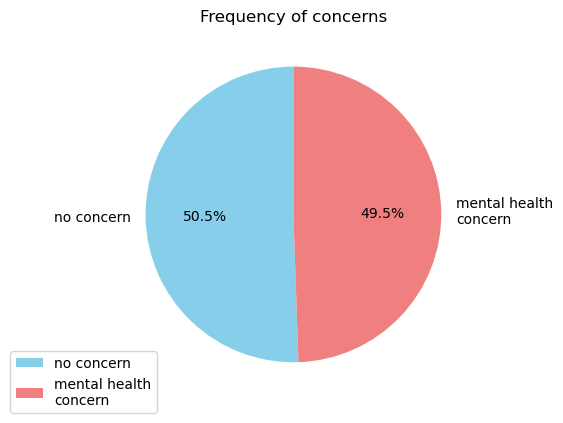

In [3]:
# Plotting a pie chart
# Calculate the value counts of the 'category' column
freq_count = mh_texts['label'].value_counts()

plt.pie(freq_count, labels=['no concern', 'mental health\nconcern'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Frequency of concerns')
plt.legend(bbox_to_anchor=(.15, .15))
plt.show()

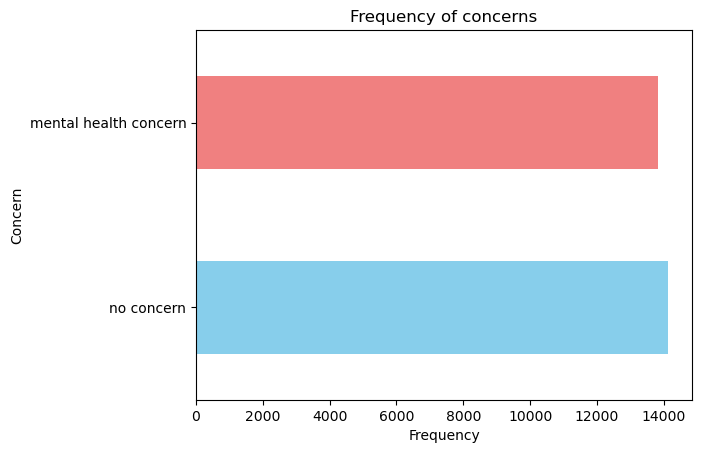

In [4]:
freq_count.plot(kind='barh', color=['skyblue', 'lightcoral'])
plt.title('Frequency of concerns')
plt.xlabel('Frequency')
plt.ylabel('Concern')
plt.show()

In [6]:
# Load models
m2m_model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
m2m_tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")

TypeError: 'NoneType' object is not callable

In [ ]:
# Translate from English to French (easy language)

In [ ]:
# Translate from French to English (to validate translation)

In [ ]:
# Translate from English to Chinese (hard language)

In [ ]:
# Translate from Chinese to English (to validate translation)

##### Comment on the pitfalls of the Meta Translation API

##### Discuss how well translation models are at translating emotinally charged texts

In [ ]:
# Split the dataset into training and testing sets
texts = ["text", "fr_text", "cn_text"]
curr_text = mh_texts["text"]
labels = mh_texts["label"]
train_texts, test_texts, train_labels, test_labels = train_test_split(curr_text, labels, test_size=0.2, random_state=42)
print("First 10 Training Texts:", train_texts[:9])
print("Training Labels:", train_labels)
print("First 10 Test texts:", test_texts[:10])
print("Test labels:", test_labels)

In [ ]:
#Run a baseline model (Logistic Regression)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)
clf = LogisticRegression(max_iter=1000).fit(X_train, train_labels)
predictions = clf.predict(X_test)
print("Logistic Regression Baseline Model:")
print(classification_report(test_labels, predictions))

# Baseline model: Multinomial Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train, train_labels)
nb_predictions = nb_clf.predict(X_test)

# Print classification report for the Multinomial Naive Bayes baseline model
print("Multinomial Naive Bayes Baseline Model:")
print(classification_report(test_labels, nb_predictions))


#### Compare the baseline models and how good their predictions are with each language


## 3. Results

## 4. Discussion and conclusions